# 1. Perkenalan
- Nama : Muhammad Julizar
- Batch : FTDS-RMT-016


### Data : [Kaggle](https://www.kaggle.com/datasets/hasibalmuzdadid/shoe-vs-sandal-vs-boot-dataset-15k-images)
### Objective : Make the best Deep learning model to predict Image about Shoe, Sandal and Boot (Computer Vision Project)



### Make directory kaggle for kaggle.json

### _Notes_ : This colab is running in Google Colab and i get the data from kaggle

In [1]:
 #bikin folder di kaggle root
!mkdir -p ~/.kaggle
# Copy paste kaggle.json
!cp kaggle.json ~/.kaggle  

# Make directory
!mkdir ./kaggle 
# Move file kaggle.json
!mv ./kaggle.json ./kaggle

# Izin akses
!chmod 600 ~/.kaggle/kaggle.json 
# Cek list dalam folder kaggle
!ls ~/.kaggle 

cp: cannot stat 'kaggle.json': No such file or directory
mkdir: cannot create directory ‘./kaggle’: File exists
mv: cannot stat './kaggle.json': No such file or directory
kaggle.json


### Download Dataset from kaggle

In [2]:
# Download Dataset
!kaggle datasets download -d hasibalmuzdadid/shoe-vs-sandal-vs-boot-dataset-15k-images

shoe-vs-sandal-vs-boot-dataset-15k-images.zip: Skipping, found more recently modified local copy (use --force to force download)


### Unzip Data

In [3]:
# Extract data from .zip
!unzip -q /content/shoe-vs-sandal-vs-boot-dataset-15k-images.zip -d images

replace images/Shoe vs Sandal vs Boot Dataset/Boot/boot (1).jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: N


# 2. Import Library

In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import glob
import cv2

import tensorflow as tf
from tensorflow.keras.callbacks import EarlyStopping,ModelCheckpoint

from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image

from tensorflow.keras.models import Sequential, Model, load_model
from tensorflow.keras import layers, models
from tensorflow.keras.layers import Conv2D, MaxPooling2D,Dense, Dropout, Flatten, Input

from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split


from sklearn.metrics import confusion_matrix
import warnings
warnings.filterwarnings('ignore')

# 3. Data Loading

In [5]:
# akses data
os.listdir('/content/images/Shoe vs Sandal vs Boot Dataset')
main_dir = '/content/images/Shoe vs Sandal vs Boot Dataset'


In [6]:
# Melihat jumlah data pada setiap class
print('Jumlah data per class: \n' + '-'*50)
num_boot= len(os.listdir(os.path.join(main_dir, 'Boot')))
num_sandal= len(os.listdir(os.path.join(main_dir, 'Sandal')))
num_shoe= len(os.listdir(os.path.join(main_dir, 'Shoe')))

print(f'jumlah gambar keseluruhan :  {num_boot +num_shoe + num_sandal }')
print('-'*50)
print(f'jumlah gambar boot :  {num_boot}')
print(f'jumlah gambar sandal : {num_sandal}')
print(f'jumlah gambar shoe : {num_shoe}')


Jumlah data per class: 
--------------------------------------------------
jumlah gambar keseluruhan :  15000
--------------------------------------------------
jumlah gambar boot :  5000
jumlah gambar sandal : 5000
jumlah gambar shoe : 5000


Dataset memuat 15000 gambar dengan 3 class yaitu boot, sandal dan shoe<br>
Pada setiap class memiliki jumlah yang sama yaitu 5000 gambar setiap classnya

In [7]:
# akses gambar pada directory
main_boot = glob.glob(main_dir+"/Boot/*.jpg")
main_sandal = glob.glob(main_dir+"/Sandal/*.jpg")
main_shoe = glob.glob(main_dir+'/Shoe/*.jpg')
main_boot[:10]

['/content/images/Shoe vs Sandal vs Boot Dataset/Boot/boot (3044).jpg',
 '/content/images/Shoe vs Sandal vs Boot Dataset/Boot/boot (597).jpg',
 '/content/images/Shoe vs Sandal vs Boot Dataset/Boot/boot (1757).jpg',
 '/content/images/Shoe vs Sandal vs Boot Dataset/Boot/boot (582).jpg',
 '/content/images/Shoe vs Sandal vs Boot Dataset/Boot/boot (711).jpg',
 '/content/images/Shoe vs Sandal vs Boot Dataset/Boot/boot (1307).jpg',
 '/content/images/Shoe vs Sandal vs Boot Dataset/Boot/boot (2407).jpg',
 '/content/images/Shoe vs Sandal vs Boot Dataset/Boot/boot (4436).jpg',
 '/content/images/Shoe vs Sandal vs Boot Dataset/Boot/boot (4804).jpg',
 '/content/images/Shoe vs Sandal vs Boot Dataset/Boot/boot (4029).jpg']

# 4. EDA (Exploratory Data Analysis)

In [8]:
# Make data into dataframe

def create_df(list_image):
    df = []
    for image in list_image:
        ## ambil nama dari file \ ke -1
        # images.append(image.split('\')[-1]) 
        # label.append(image.split('\')[-2])
        df.append((image, image.split('/')[-2]))
    return pd.DataFrame(df, columns=['images', 'Classes'])

train_df = create_df(main_boot + main_sandal + main_shoe)
train_df = train_df.sample(frac=1, random_state=77).reset_index(drop=True)
train_df



,images,Classes
0,/content/images/Shoe vs Sandal vs Boot Dataset...,Boot
1,/content/images/Shoe vs Sandal vs Boot Dataset...,Boot
2,/content/images/Shoe vs Sandal vs Boot Dataset...,Sandal
3,/content/images/Shoe vs Sandal vs Boot Dataset...,Sandal
4,/content/images/Shoe vs Sandal vs Boot Dataset...,Sandal
...,...,...
14995,/content/images/Shoe vs Sandal vs Boot Dataset...,Sandal
14996,/content/images/Shoe vs Sandal vs Boot Dataset...,Boot
14997,/content/images/Shoe vs Sandal vs Boot Dataset...,Shoe
14998,/content/images/Shoe vs Sandal vs Boot Dataset...,Shoe


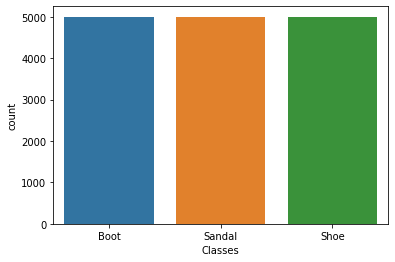

In [9]:
# See barplot about classes
sns.countplot(data=train_df, x=train_df['Classes'])

In [10]:
# Split data into val and test set

train_df, val_df = train_test_split(train_df, test_size=0.2, random_state=77, stratify = train_df['Classes'])
train_df, test_df = train_test_split(train_df, test_size=0.2, random_state=44, stratify = train_df['Classes'])

print(train_df.shape)
print(val_df.shape)
print(test_df.shape)



(9600, 2)
(3000, 2)
(2400, 2)


Setelah displit menggunakan `train_test_split` terdapat 9600 buah data pada data train, 3000 pada data validation dan 2400 pada data test

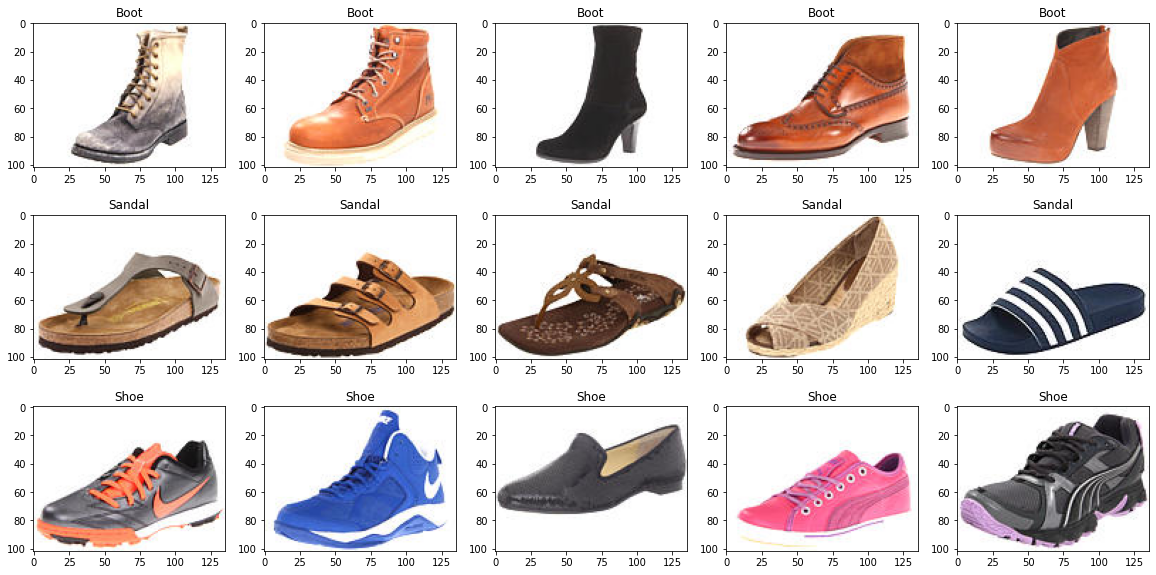

In [11]:
# Get 5 data for all classes
boot_samples = (train_df[train_df['Classes']=="Boot"]['images'].iloc[:5]).tolist()
sandal_samples = (train_df[train_df['Classes']=='Sandal']['images'].iloc[:5]).tolist()
shoe_samples = (train_df[train_df['Classes']=='Shoe']['images'].iloc[:5]).tolist()

# visualize sample images
def visualize_samples(samples):
    fig, ax = plt.subplots(3,5 , figsize=(20,10))
    
    for i, sample in enumerate(samples):
        img = cv2.imread(sample)
        ax[i//5, i%5].set_title(sample.split('/')[-2])
        ax[i//5, i%5].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.show()

visualize_samples(boot_samples + sandal_samples + shoe_samples)

Menampilkan 5 data pertama pada data set

# 5. Data Preprocessing

In [12]:
# Define target
y_test = test_df['Classes']
y_test_reshape = np.array(y_test).reshape(-1,1)

Mendefinisikan tarfet pada data test

## 5.1 Encoding

In [50]:
# Label encoding
label = LabelEncoder()
label.fit(y_test_reshape)
y_test_label = label.transform(y_test_reshape)
y_test_label

array([0, 2, 0, ..., 2, 0, 2])

Melakukan encoding pada test data agar nanti dapat dilihat classification report

## 5.2 Data Augmentasi

In [15]:
# make new variable
width = 136
height = 102
SEED = 1
BATCH = 128

In [16]:
# create image generator
train_datagen = ImageDataGenerator(
    rescale=1./255, # normalisasi pixel
    rotation_range=0.2,
    width_shift_range=0.3,
    height_shift_range=0.3,
    zoom_range=0.3,
    horizontal_flip=True)

vaL_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

In [17]:
ds_train = train_datagen.flow_from_dataframe(
    dataframe=train_df,
    x_col='images',
    y_col='Classes',
    target_size=(width, height),
    class_mode='categorical',
    batch_size=BATCH,
    shuffle=True,
    seed=SEED)

ds_val = vaL_datagen.flow_from_dataframe(
    dataframe=val_df,
    x_col='images',
    y_col='Classes',
    target_size=(width, height),
    class_mode='categorical',
    batch_size=BATCH,
    shuffle=False,
    seed=SEED)

ds_test = test_datagen.flow_from_dataframe(
    dataframe=test_df,
    x_col='images',
    y_col='Classes',
    target_size=(width, height),
    class_mode='categorical',
    batch_size=BATCH,
    shuffle=False,
    seed=SEED)

Found 9600 validated image filenames belonging to 3 classes.
Found 3000 validated image filenames belonging to 3 classes.
Found 2400 validated image filenames belonging to 3 classes.


In [18]:
print(ds_train.class_indices)

# Make list target
target = list(ds_train.class_indices.keys())
print(target)

{'Boot': 0, 'Sandal': 1, 'Shoe': 2}
['Boot', 'Sandal', 'Shoe']


Membuat list target dalam 1 variabel

# 6. Modelling

## 6.1 Sequential (Basic model & Improvement)

## Base Sequential

In [19]:
# make model
base_seq = Sequential()

# Layer 1
base_seq.add(Conv2D(filters=8, activation='relu', kernel_size=7, input_shape=[width,height,3]))
base_seq.add(MaxPooling2D())

# Layer 2
base_seq.add(Conv2D(filters=16, kernel_size=3, activation='relu'))
base_seq.add(MaxPooling2D())


base_seq.add(Flatten())
base_seq.add(Dense(32, activation='relu'))
base_seq.add(Dense(3, activation='softmax'))

base_seq.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 130, 96, 8)        1184      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 65, 48, 8)        0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 63, 46, 16)        1168      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 31, 23, 16)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 11408)             0         
                                                                 
 dense (Dense)               (None, 32)                3

In [20]:
base_seq.compile(optimizer='adam', 
                        loss='categorical_crossentropy', 
                        metrics= ['accuracy'])  

## Sequential Improvement

In [33]:
# make model
Sequential_model= Sequential()

# Layer 1
Sequential_model.add(Conv2D(filters=8, kernel_size=7, activation='relu',
                       input_shape=[width,height,3]))
Sequential_model.add(MaxPooling2D(pool_size=2, strides=2))

# Layer 2
Sequential_model.add(Conv2D(filters=16, kernel_size=3, activation='relu', padding='same'))
Sequential_model.add(MaxPooling2D(pool_size=2,
                                  strides=2))

# Layer 3
Sequential_model.add(Conv2D(filters=32, kernel_size=5, activation='relu', padding='same'))
Sequential_model.add(MaxPooling2D(pool_size=2,
                                  strides=2))

Sequential_model.add(Flatten())
Sequential_model.add(layers.Dropout(0.2))

Sequential_model.add(Dense(64, activation='relu'))
Sequential_model.add(layers.Dropout(0.2))

Sequential_model.add(Dense(32, activation='relu'))
Sequential_model.add(layers.Dropout(0.2))

Sequential_model.add(Dense(3, activation='softmax'))

Sequential_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 130, 96, 8)        1184      
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 65, 48, 8)        0         
 g2D)                                                            
                                                                 
 conv2d_11 (Conv2D)          (None, 65, 48, 16)        1168      
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 32, 24, 16)       0         
 g2D)                                                            
                                                                 
 conv2d_12 (Conv2D)          (None, 32, 24, 32)        12832     
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 16, 12, 32)      

In [34]:
Sequential_model.compile(optimizer='adam', 
                        loss='categorical_crossentropy', 
                        metrics= ['accuracy'])  

## Base Functional

In [23]:
# Define functional base model
input_layer = Input(shape=(width,height,3))

# Layer 1
func = Conv2D(filters=16, kernel_size=3, activation='relu')(input_layer)
func = MaxPooling2D()(func)

# Layer 2
func = Conv2D(filters=32, kernel_size=3, activation='relu')(func)
func = MaxPooling2D()(func)


# image to vector
func = Flatten()(func)
func = Dense(32, activation='relu')(func)
output_layer = Dense(3, activation='softmax')(func)

base_func = Model(inputs=input_layer, outputs=output_layer)

base_func.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 136, 102, 3)]     0         
                                                                 
 conv2d_5 (Conv2D)           (None, 134, 100, 16)      448       
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 67, 50, 16)       0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 65, 48, 32)        4640      
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 32, 24, 32)       0         
 2D)                                                             
                                                                 
 flatten_2 (Flatten)         (None, 24576)             0     

In [24]:
# compile
base_func.compile(loss='categorical_crossentropy',
                         optimizer='adam',
                         metrics=['accuracy'])

## Functional Improvement

In [25]:
# Define functional base model
input_layer = Input(shape=([width,height,3]))

# Layer 1
func_improve = Conv2D(filters=16, kernel_size=3, activation='relu')(input_layer)
func_improve = MaxPooling2D(pool_size=2, strides=2)(func_improve)

# Layer 2
func_improve = Conv2D(filters=32, kernel_size=3, activation='relu')(func_improve)
func_improve = MaxPooling2D(pool_size=2, strides=2, padding='same')(func_improve)

# Layer 3
func_improve = Conv2D(filters=64, kernel_size=3, activation='relu')(func_improve)
func_improve = MaxPooling2D(pool_size=2, strides=2, padding='same')(func_improve)

# image to vector
func_improve = Flatten()(func_improve)
func_improve = Dropout(0.2)(func_improve)

func_improve = Dense(64, activation='relu')(func_improve)
func_improve = Dropout(0.2)(func_improve)

func_improve = Dense(32, activation='relu')(func_improve)
func_improve = Dropout(0.2)(func_improve)


output_layer = Dense(3, activation='softmax')(func_improve)

functional_improve = Model(inputs=input_layer, outputs=output_layer)

functional_improve.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 136, 102, 3)]     0         
                                                                 
 conv2d_7 (Conv2D)           (None, 134, 100, 16)      448       
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 67, 50, 16)       0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 65, 48, 32)        4640      
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 33, 24, 32)       0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 31, 22, 64)        1849

In [26]:
# compile
functional_improve.compile(loss='categorical_crossentropy',
                         optimizer='adam',
                         metrics=['accuracy'])

# 7. Model Training

## Base Sequential

In [27]:
cb_base_seq = [
    EarlyStopping(monitor='val_loss', patience=3),
    ModelCheckpoint('base_model_seq.hdf5', monitor='val_loss', save_best_only=True)
]

In [28]:
history_base = base_seq.fit(ds_train,
                              batch_size= BATCH, 
                              epochs= 20,
                              validation_data= ds_val,
                              callbacks=cb_base_seq)

Epoch 1/20
75/75 [==============================] - 40s 454ms/step - loss: 1.1769 - accuracy: 0.4339 - val_loss: 0.8389 - val_accuracy: 0.6423
Epoch 2/20
75/75 [==============================] - 35s 470ms/step - loss: 0.9539 - accuracy: 0.5348 - val_loss: 0.8118 - val_accuracy: 0.6680
Epoch 3/20
75/75 [==============================] - 35s 470ms/step - loss: 0.8818 - accuracy: 0.5696 - val_loss: 0.6357 - val_accuracy: 0.7127
Epoch 4/20
75/75 [==============================] - 35s 461ms/step - loss: 0.8097 - accuracy: 0.6111 - val_loss: 0.6714 - val_accuracy: 0.6643
Epoch 5/20
75/75 [==============================] - 34s 454ms/step - loss: 0.7902 - accuracy: 0.6208 - val_loss: 0.5751 - val_accuracy: 0.7323
Epoch 6/20
75/75 [==============================] - 36s 482ms/step - loss: 0.7667 - accuracy: 0.6342 - val_loss: 0.6423 - val_accuracy: 0.7047
Epoch 7/20
75/75 [==============================] - 37s 492ms/step - loss: 0.7248 - accuracy: 0.6580 - val_loss: 0.5392 - val_accuracy: 0.7547

## Sequential Improvement

In [35]:
cb_improve_seq = [
    EarlyStopping(monitor='val_loss', patience=3),
    ModelCheckpoint('improve_model_seq.hdf5', monitor='val_loss', save_best_only=True)
]

In [36]:
history= Sequential_model.fit(ds_train,
                              batch_size= BATCH, 
                              epochs= 20,
                              validation_data= ds_val,
                              callbacks=cb_improve_seq)

Epoch 1/20
75/75 [==============================] - 35s 465ms/step - loss: 1.0101 - accuracy: 0.4670 - val_loss: 0.7761 - val_accuracy: 0.6533
Epoch 2/20
75/75 [==============================] - 34s 459ms/step - loss: 0.8656 - accuracy: 0.5781 - val_loss: 0.6851 - val_accuracy: 0.6960
Epoch 3/20
75/75 [==============================] - 37s 496ms/step - loss: 0.7631 - accuracy: 0.6319 - val_loss: 0.6705 - val_accuracy: 0.6617
Epoch 4/20
75/75 [==============================] - 34s 457ms/step - loss: 0.7058 - accuracy: 0.6652 - val_loss: 0.5954 - val_accuracy: 0.6937
Epoch 5/20
75/75 [==============================] - 36s 474ms/step - loss: 0.6574 - accuracy: 0.6942 - val_loss: 0.5122 - val_accuracy: 0.7740
Epoch 6/20
75/75 [==============================] - 34s 458ms/step - loss: 0.6085 - accuracy: 0.7261 - val_loss: 0.4426 - val_accuracy: 0.8157
Epoch 7/20
75/75 [==============================] - 34s 455ms/step - loss: 0.5648 - accuracy: 0.7517 - val_loss: 0.4775 - val_accuracy: 0.8170

## Base Functional

In [37]:
cb_base_func = [
    EarlyStopping(monitor='val_loss', patience=3),
    ModelCheckpoint('base_model_func.hdf5', monitor='val_loss', save_best_only=True)
]

In [38]:
history_base_func = base_func.fit(ds_train,
                              batch_size= BATCH, 
                              epochs= 20,
                              validation_data= ds_val,
                              callbacks=cb_base_func)

Epoch 1/20
75/75 [==============================] - 34s 449ms/step - loss: 0.7223 - accuracy: 0.7021 - val_loss: 0.6286 - val_accuracy: 0.7403
Epoch 2/20
75/75 [==============================] - 34s 452ms/step - loss: 0.6778 - accuracy: 0.7074 - val_loss: 0.5557 - val_accuracy: 0.7570
Epoch 3/20
75/75 [==============================] - 34s 451ms/step - loss: 0.6228 - accuracy: 0.7289 - val_loss: 0.5117 - val_accuracy: 0.7780
Epoch 4/20
75/75 [==============================] - 34s 449ms/step - loss: 0.6173 - accuracy: 0.7330 - val_loss: 0.4863 - val_accuracy: 0.8033
Epoch 5/20
75/75 [==============================] - 35s 465ms/step - loss: 0.6014 - accuracy: 0.7353 - val_loss: 0.5803 - val_accuracy: 0.7627
Epoch 6/20
75/75 [==============================] - 34s 447ms/step - loss: 0.6099 - accuracy: 0.7374 - val_loss: 0.5112 - val_accuracy: 0.7877
Epoch 7/20
75/75 [==============================] - 34s 452ms/step - loss: 0.5680 - accuracy: 0.7539 - val_loss: 0.4581 - val_accuracy: 0.8203

## Functional Improvement

In [39]:
cb_improve_func = [
    EarlyStopping(monitor='val_loss', patience=3),
    ModelCheckpoint('improve_model_func.hdf5', monitor='val_loss', save_best_only=True)
]

In [40]:
history_improvement_func = functional_improve.fit(ds_train,
                              batch_size= BATCH, 
                              epochs= 20,
                              validation_data= ds_val,
                              callbacks=cb_improve_func)

Epoch 1/20
75/75 [==============================] - 35s 455ms/step - loss: 1.0216 - accuracy: 0.4552 - val_loss: 0.8634 - val_accuracy: 0.6123
Epoch 2/20
75/75 [==============================] - 35s 466ms/step - loss: 0.8355 - accuracy: 0.6076 - val_loss: 0.6369 - val_accuracy: 0.7203
Epoch 3/20
75/75 [==============================] - 34s 453ms/step - loss: 0.7293 - accuracy: 0.6639 - val_loss: 0.6477 - val_accuracy: 0.7227
Epoch 4/20
75/75 [==============================] - 34s 452ms/step - loss: 0.6938 - accuracy: 0.6772 - val_loss: 0.5293 - val_accuracy: 0.7717
Epoch 5/20
75/75 [==============================] - 34s 452ms/step - loss: 0.6669 - accuracy: 0.6882 - val_loss: 0.4779 - val_accuracy: 0.8067
Epoch 6/20
75/75 [==============================] - 34s 448ms/step - loss: 0.6229 - accuracy: 0.7180 - val_loss: 0.5092 - val_accuracy: 0.7893
Epoch 7/20
75/75 [==============================] - 35s 467ms/step - loss: 0.5976 - accuracy: 0.7360 - val_loss: 0.4408 - val_accuracy: 0.8140

# 8. Model Evaluation

## Base Sequential

In [41]:
history_base_df = pd.DataFrame(history_base.history)
history_base_df

,loss,accuracy,val_loss,val_accuracy
0,1.176924,0.433854,0.838945,0.642333
1,0.953921,0.534792,0.811751,0.668000
2,0.881781,0.569583,0.635742,0.712667
3,0.809732,0.611146,0.671370,0.664333
4,0.790207,0.620833,0.575076,0.732333
5,0.766686,0.634167,0.642324,0.704667
6,0.724815,0.658021,0.539220,0.754667
7,0.670966,0.692292,0.502086,0.781000
8,0.656503,0.700938,0.626511,0.709000
9,0.666960,0.688021,0.592678,0.736667


In [42]:
test_results = base_seq.evaluate(ds_test, verbose=0)
print(f'Test Loss     : {test_results[0]:.4f}')
print(f'Test Accuracy : {test_results[1]:.4f}')

Test Loss     : 0.5283
Test Accuracy : 0.7613


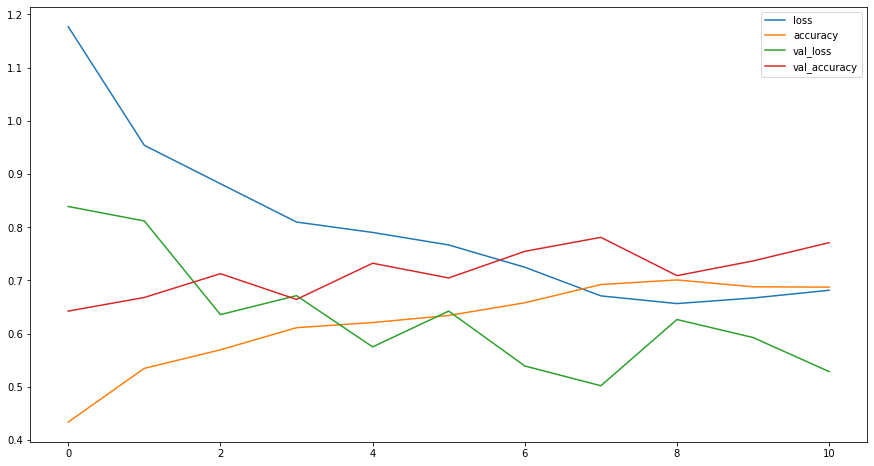

In [43]:
plt.figure(figsize=(15,8))
sns.lineplot(data=history_base_df, dashes=False)
plt.show()

In [51]:
y_pred_seq_base = base_seq.predict(ds_test)
y_pred_seq_base = np.argmax(y_pred_seq_base, axis=1)

y_pred_seq_base

19/19 [==============================] - 2s 81ms/step


array([0, 2, 0, ..., 2, 0, 2])

In [52]:
# Classification Report
print(classification_report(y_test_label, y_pred_seq_base, target_names= target))

              precision    recall  f1-score   support

        Boot       0.92      0.91      0.91       800
      Sandal       0.65      0.76      0.70       800
        Shoe       0.74      0.61      0.67       800

    accuracy                           0.76      2400
   macro avg       0.77      0.76      0.76      2400
weighted avg       0.77      0.76      0.76      2400



## Sequential Improvement

In [53]:
history_improvement = pd.DataFrame(history.history)
history_improvement

,loss,accuracy,val_loss,val_accuracy
0,1.010107,0.466979,0.776132,0.653333
1,0.865567,0.578125,0.685100,0.696000
2,0.763113,0.631875,0.670540,0.661667
3,0.705760,0.665208,0.595381,0.693667
4,0.657438,0.694167,0.512243,0.774000
5,0.608504,0.726146,0.442555,0.815667
6,0.564850,0.751667,0.477482,0.817000
7,0.540186,0.768333,0.373225,0.849000
8,0.516211,0.781667,0.360345,0.853000
9,0.478858,0.805104,0.377384,0.839667


In [55]:
test_results = Sequential_model.evaluate(ds_test, verbose=0)
print(f'Test Loss     : {test_results[0]:.4f}')
print(f'Test Accuracy : {test_results[1]:.4f}')

Test Loss     : 0.2033
Test Accuracy : 0.9212


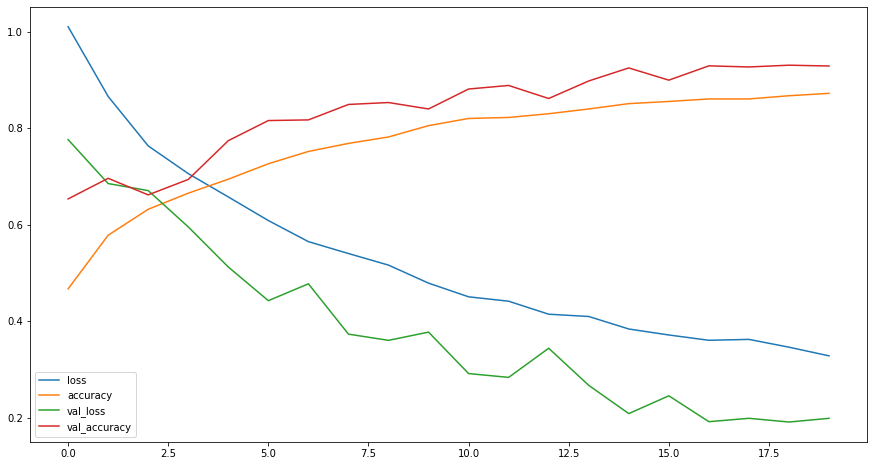

In [56]:
plt.figure(figsize=(15,8))
sns.lineplot(data= history_improvement, dashes=False)
plt.show()

In [57]:
# predict test data
y_pred_seq = Sequential_model.predict(ds_test)
y_pred_seq = np.argmax(y_pred_seq, axis=1)

y_pred_seq

19/19 [==============================] - 2s 78ms/step


array([0, 2, 0, ..., 2, 0, 2])

In [58]:
# Classification Report
print(classification_report(y_test_label, y_pred_seq, target_names= target))

              precision    recall  f1-score   support

        Boot       0.97      0.94      0.96       800
      Sandal       0.84      0.96      0.90       800
        Shoe       0.96      0.86      0.91       800

    accuracy                           0.92      2400
   macro avg       0.93      0.92      0.92      2400
weighted avg       0.93      0.92      0.92      2400



## Base Functional

In [59]:
history_base_func_df = pd.DataFrame(history_base_func.history)
history_base_func_df

,loss,accuracy,val_loss,val_accuracy
0,0.722270,0.702083,0.628580,0.740333
1,0.677804,0.707396,0.555676,0.757000
2,0.622779,0.728854,0.511740,0.778000
3,0.617294,0.733021,0.486322,0.803333
4,0.601424,0.735313,0.580333,0.762667
5,0.609887,0.737396,0.511179,0.787667
6,0.567996,0.753854,0.458106,0.820333
7,0.550932,0.768542,0.484932,0.785667
8,0.551146,0.764896,0.486058,0.788000
9,0.536904,0.771458,0.424518,0.828000


In [60]:
test_results = base_func.evaluate(ds_test, verbose=0)
print(f'Test Loss     : {test_results[0]:.4f}')
print(f'Test Accuracy : {test_results[1]:.4f}')

Test Loss     : 0.4180
Test Accuracy : 0.8163


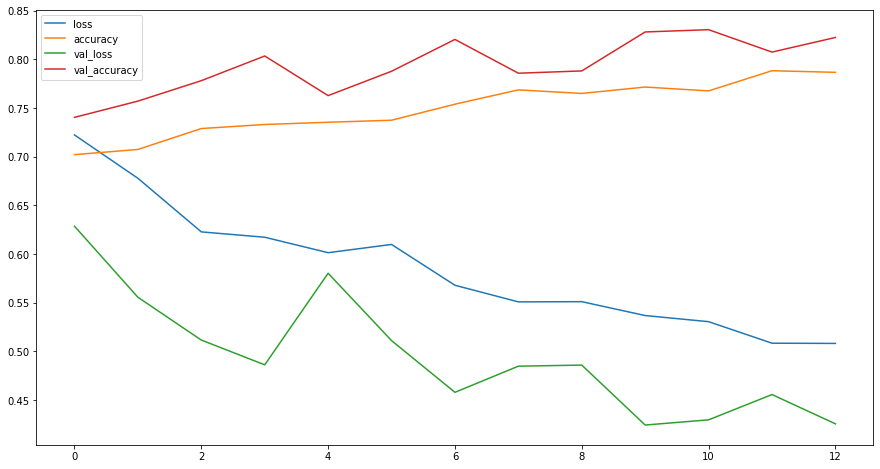

In [61]:
plt.figure(figsize=(15,8))
sns.lineplot(data=history_base_func_df, dashes=False)

In [62]:
# predict test data
y_pred_func = base_func.predict(ds_test)
y_pred_func = np.argmax(y_pred_func, axis=1)

y_pred_func

19/19 [==============================] - 2s 80ms/step


array([0, 2, 0, ..., 1, 0, 2])

In [63]:
# Classification Report
print(classification_report(y_test_label, y_pred_func, target_names= target))

              precision    recall  f1-score   support

        Boot       0.90      0.96      0.93       800
      Sandal       0.72      0.82      0.77       800
        Shoe       0.84      0.67      0.74       800

    accuracy                           0.82      2400
   macro avg       0.82      0.82      0.81      2400
weighted avg       0.82      0.82      0.81      2400



## Functional Improvement

In [64]:
history_improvement_func_df = pd.DataFrame(history_improvement_func.history)
history_improvement_func_df


,loss,accuracy,val_loss,val_accuracy
0,1.021624,0.455208,0.863379,0.612333
1,0.835495,0.607604,0.636889,0.720333
2,0.729305,0.663854,0.647668,0.722667
3,0.693838,0.677188,0.529279,0.771667
4,0.666877,0.688229,0.477893,0.806667
5,0.622883,0.718021,0.509237,0.789333
6,0.597604,0.736042,0.440765,0.814000
7,0.579353,0.746562,0.444161,0.833667
8,0.545032,0.764583,0.391055,0.837333
9,0.517648,0.781771,0.331274,0.871000


In [65]:
test_results = functional_improve.evaluate(ds_test, verbose=0)
print(f'Test Loss     : {test_results[0]:.4f}')
print(f'Test Accuracy : {test_results[1]:.4f}')

Test Loss     : 0.2111
Test Accuracy : 0.9246


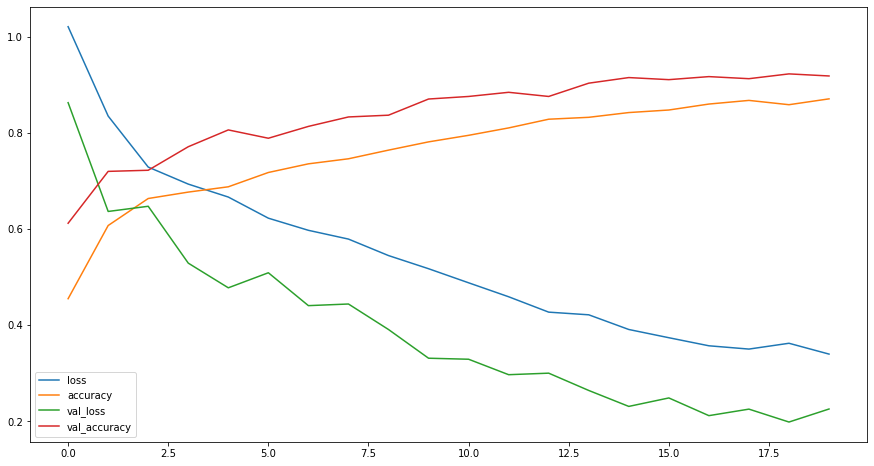

In [66]:
plt.figure(figsize=(15,8))
sns.lineplot(data=history_improvement_func_df, dashes=False)

In [129]:
# predict test data
y_pred_improve_func = functional_improve.predict(ds_test)
y_pred_improve_func = np.argmax(y_pred_improve_func, axis=1)

y_pred_improve_func[:20]

19/19 [==============================] - 2s 99ms/step


array([0, 2, 0, 2, 1, 1, 0, 2, 1, 1, 2, 2, 0, 0, 0, 0, 1, 2, 0, 2])

In [68]:
# Classification Report
print(classification_report(y_test_label, y_pred_improve_func, target_names= target))

              precision    recall  f1-score   support

        Boot       0.93      0.99      0.96       800
      Sandal       0.93      0.89      0.91       800
        Shoe       0.91      0.90      0.91       800

    accuracy                           0.92      2400
   macro avg       0.92      0.92      0.92      2400
weighted avg       0.92      0.92      0.92      2400



# Transfer Learning

In [69]:
# cb transfer_learning
cb_tf = [
    EarlyStopping(monitor='val_loss', patience=3),
    ModelCheckpoint('Transfer_learning.hdf5', monitor='val_loss', save_best_only=True)
]

In [70]:
pretrained = tf.keras.applications.Xception(include_top=False, input_shape=([width, height, 3]), pooling='max', classifier_activation='softmax')
pretrained.trainable = False

In [71]:
tf_learning = Sequential()
tf_learning.add(pretrained)

tf_learning.add(Flatten())

tf_learning.add(Dense(64, activation='relu'))
tf_learning.add(layers.Dropout(0.2))

tf_learning.add(Dense(32, activation='relu'))
tf_learning.add(layers.Dropout(0.2))

tf_learning.add(Dense(3, activation='softmax'))

tf_learning.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 xception (Functional)       (None, 2048)              20861480  
                                                                 
 flatten_5 (Flatten)         (None, 2048)              0         
                                                                 
 dense_13 (Dense)            (None, 64)                131136    
                                                                 
 dropout_9 (Dropout)         (None, 64)                0         
                                                                 
 dense_14 (Dense)            (None, 32)                2080      
                                                                 
 dropout_10 (Dropout)        (None, 32)                0         
                                                                 
 dense_15 (Dense)            (None, 3)                

In [72]:
tf_learning.compile(optimizer='adam', 
                        loss='categorical_crossentropy', 
                        metrics= ['accuracy'])  

In [73]:
history_tf_learning = tf_learning.fit(ds_train,
                              batch_size= BATCH, 
                              epochs= 10,
                              validation_data= ds_val,
                              callbacks=cb_tf)

Epoch 1/10
75/75 [==============================] - 46s 545ms/step - loss: 0.6465 - accuracy: 0.7148 - val_loss: 0.2517 - val_accuracy: 0.9103
Epoch 2/10
75/75 [==============================] - 38s 504ms/step - loss: 0.4088 - accuracy: 0.8473 - val_loss: 0.2438 - val_accuracy: 0.9110
Epoch 3/10
75/75 [==============================] - 38s 503ms/step - loss: 0.3791 - accuracy: 0.8559 - val_loss: 0.1949 - val_accuracy: 0.9260
Epoch 4/10
75/75 [==============================] - 38s 501ms/step - loss: 0.3652 - accuracy: 0.8645 - val_loss: 0.1921 - val_accuracy: 0.9273
Epoch 5/10
75/75 [==============================] - 38s 511ms/step - loss: 0.3333 - accuracy: 0.8793 - val_loss: 0.1755 - val_accuracy: 0.9330
Epoch 6/10
75/75 [==============================] - 38s 505ms/step - loss: 0.3202 - accuracy: 0.8785 - val_loss: 0.1728 - val_accuracy: 0.9360
Epoch 7/10
75/75 [==============================] - 38s 501ms/step - loss: 0.3135 - accuracy: 0.8852 - val_loss: 0.1883 - val_accuracy: 0.9263

In [74]:
tf_learning_df = pd.DataFrame(history_tf_learning.history)

<function matplotlib.pyplot.show(*args, **kw)>

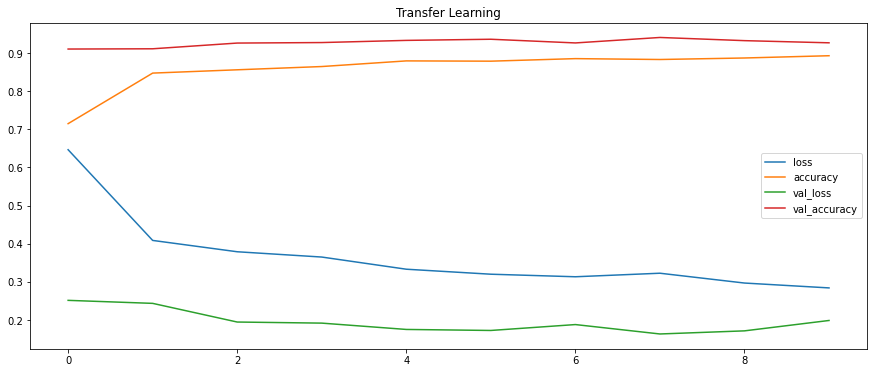

In [75]:
plt.figure(figsize=(15,6))

sns.lineplot(data=tf_learning_df, dashes=False)
plt.title('Transfer Learning')
plt.show

In [76]:
test_results = tf_learning.evaluate(ds_test, verbose=0)
print(f'Test Loss     : {test_results[0]:.4f}')
print(f'Test Accuracy : {test_results[1]:.4f}')

Test Loss     : 0.2195
Test Accuracy : 0.9175


In [128]:
# predict test data
y_pred_tf_learning = tf_learning.predict(ds_test)
y_pred_tf_learning = np.argmax(y_pred_tf_learning, axis=1)

y_pred_tf_learning

19/19 [==============================] - 3s 163ms/step


array([0, 2, 0, ..., 2, 0, 2])

In [78]:
print(classification_report(y_test_label, y_pred_tf_learning, target_names=target))

              precision    recall  f1-score   support

        Boot       0.99      0.91      0.95       800
      Sandal       0.96      0.87      0.91       800
        Shoe       0.83      0.98      0.90       800

    accuracy                           0.92      2400
   macro avg       0.93      0.92      0.92      2400
weighted avg       0.93      0.92      0.92      2400



# 9. Model Saving

In [86]:
# Freeze Model
functional_improve.trainable = False
# Save model
functional_improve.save('Best_Model.h5')

# 10. Model Inference

In [87]:
# Load Model
best_model = load_model('/content/Best_Model.h5', compile=False)
best_model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 136, 102, 3)]     0         
                                                                 
 conv2d_7 (Conv2D)           (None, 134, 100, 16)      448       
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 67, 50, 16)       0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 65, 48, 32)        4640      
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 33, 24, 32)       0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 31, 22, 64)        1849

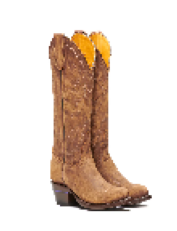

1/1 [==============================] - 0s 48ms/step
Max Class  :  0
Class Name :  Boot



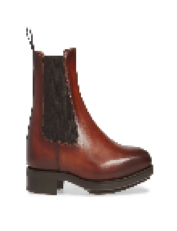

1/1 [==============================] - 0s 22ms/step
Max Class  :  0
Class Name :  Boot



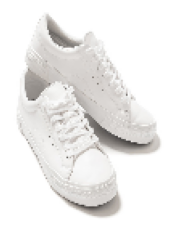

1/1 [==============================] - 0s 23ms/step
Max Class  :  2
Class Name :  Shoe



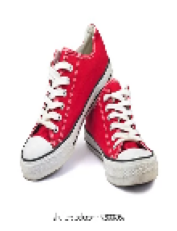

1/1 [==============================] - 0s 23ms/step
Max Class  :  2
Class Name :  Shoe



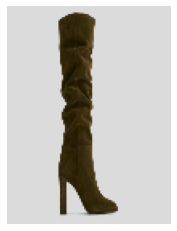

1/1 [==============================] - 0s 52ms/step
Max Class  :  0
Class Name :  Boot



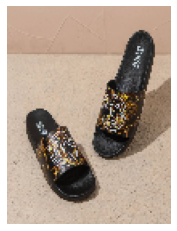

1/1 [==============================] - 0s 15ms/step
Max Class  :  2
Class Name :  Shoe



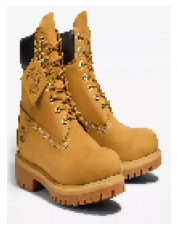

1/1 [==============================] - 0s 16ms/step
Max Class  :  0
Class Name :  Boot



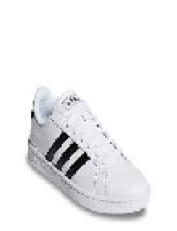

1/1 [==============================] - 0s 14ms/step
Max Class  :  2
Class Name :  Shoe



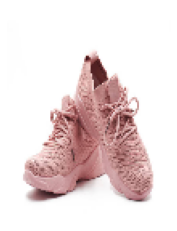

1/1 [==============================] - 0s 16ms/step
Max Class  :  2
Class Name :  Shoe



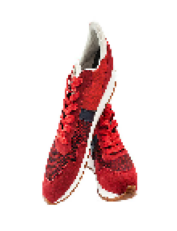

1/1 [==============================] - 0s 14ms/step
Max Class  :  0
Class Name :  Boot



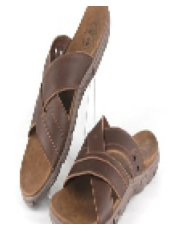

1/1 [==============================] - 0s 18ms/step
Max Class  :  1
Class Name :  Sandal



In [132]:
# Test Images
img_paths = ['/content/Inference (1).jpg',
             '/content/Inference (2).jpg',
             '/content/Inference (3).jpg',
             '/content/Inference (4).jpg',
             '/content/Inference (5).jpg',
             '/content/Inference (6).jpg',
             '/content/Inference (7).jpg',
             '/content/Inference (8).jpg',
             '/content/Inference (9).jpg',
             '/content/Inference (10).jpg',
             '/content/Inference (11).jpg']

for filename in img_paths:
  img = image.load_img(filename, target_size=(width, height))
  plt.imshow(img)
  plt.axis('off')
  plt.show()

  img_array = tf.keras.preprocessing.image.img_to_array(img)
  img_batch = np.expand_dims(img_array, axis=0)

  prediction = functional_improve.predict(img_batch)
  result_max_proba = prediction.argmax(axis=1)[0]
  result_class = target[result_max_proba]

  print('Max Class  : ', result_max_proba)
  print('Class Name : ', result_class)
  print('')

# 11 Kesimpulan

## A. Model Analysis


Pada topik (Computer Vision) kali ini saya melakukan image classification 3 label dengan memprediksi Boot, Sandal dan Shoe

Saya menggunakan 5 model berbeda, diantaranya :
- 2 Base model (Sequential dan Functional)
- 2 Improvement Model (Sequential dan Functional)
- 1 Model [Transfer Learning](https://www.tensorflow.org/api_docs/python/tf/keras/applications/xception/Xception)
<br><br>

### 1. Base Model (Sequential dan Functional)
Pada model sequential dan functional saya lakukan training data dengan basic setting, yaitu dengan 2 layer convolutional, 1 layer Flatten yang digunakan untuk mengubah gambar ke vector lalu 1 hidden layer dan 1 outputlayer.<br>


Didapatkan hasil yang kurang memuaskan pada masing-masing model baik sequential dan functional.  Jika dilihat dari evaluation menggunakan classification report

Pada model sequential didapatkan Nilai `akurasi 76%` dan `f1 score` pada class `Boot, Sandal dan Shoe` masing masing adalah `91%, 70%, 67%` <br>
Sedangkan Pada model functional lebih tinggi dengan `akurasi sebesar 82%` dan nilai f1 score pada class Boot, Sandal dan Shoe masing masing adalah `93%, 77% dan 74%`. yang mana base model functional memiliki performa lebih baik dibandingkan dengan base model sequential.

<br><br>
### 2. Improvement Model (Sequential dan Functional)
Dikarenakan pada base model peforma model belum memuaskan maka dilakukan improvement pada model sequential dan functional.

Pada kedua improvement model dilakukan penambahan 1 convolutional layer dan ditambahkan 1  hidden layer, sehingga summary pada kedua model adalah 3 convolutional layer, 1 flatten, 1 hidden layer, dan 1 output layer.

Teknik optimization yang dilakukan pada kedua model adalah dengan menambahkan `dropout=0.2 dan padding='same'`.
Dari teknik optimization yang telah dilakukan didapatkan peningkatan performa model baik pada `akurasi` maupun nilai `f1 score` disetiap class.<br>
Nilai akurasi pada sequential model adalah `92,12%` dengan f1 score pada class `Boot, Sandal dan Shoe` masing-masing bernilai `96%, 90% dan 91%`

Sedangkan nilai akurasi pada functional model adalah `92,46%` dengan f1 score pada class `Boot, Sandal dan Shoe` masing-masing bernilai `96%, 91% dan 91%`
Terdapat perbedaan `1%` pada class sandal, sehingga pada improvement kali ini tetap functional menjadi model dengan performa yang lebih baik dibandingkan sequential

<br><br>
### 3. Transfer Learning
Pada transfer learning model yang dipilih adalah [Xception](https://www.tensorflow.org/api_docs/python/tf/keras/applications/xception/Xception). Performa dari model transfer learning adalah, `akurasi 91,75%` dengan nilai `f1 score` class Boot, Sandal, Shoe adalah `95%, 91% dan 90%`
<br><br>
### Final
Dari hasil peforma ke-5 model yang telah dilakukan training, didapatkan bahwa model `Functional Improvement` merupakan model terbaik untuk memprediksi gambar `Boot, Sandal dan Shoe`, dengan `akurasi sebesar 82%` dan nilai f1 score pada class Boot, Sandal dan Shoe masing masing adalah `93%, 77% dan 74%` 

sedangkan model `Base Sequential` Merupakan model terburuk dengan nilai `akurasi 76%` dan `f1 score` pada class `Boot, Sandal dan Shoe` masing masing adalah `91%, 70%, 67%` untuk melakukan prediksi terhadap gambar `Boot, Sandal dan Shoe`

## B. OverAll Analysis

###  EDA
Dilakukan pemeriksaan jumlah setiap classes untuk melihat data balanced atau tidak, setelah dilihat ternyata jumlah setiap classes dengan total masing-masing class adalah 5000

### Data Preprocessing
- Dilakukan train test split untuk mengambil 20% data Validation dan Test, dengan dilakukan pembagian class/stratify yg sama pada data Train.
- Lalu di lakukan encoding untuk setiap classnya
- Setelah itu dilakukan augmentasi data dengan melakukan scalling pixel pada train, val dan test lalu menambahkan parameter `rotation_range=0.2, width_shift_range=0.3, height_shift_range=0.3, zoom_range=0.3, horizontal_flip=True` pada Train Data

### Modelling
Modelling kali ini menggunakan model `sequential dan functional` dilakukan train 2 basic model 2 model improvement dan 1 Model Transfer learning.
Dari hasil modelling didapatkan model terbaik adalah model `Functional Improvement` dan model terburuk adalah model `Base Sequential`
